Bibliotecas

In [3]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

Carga del dataset

In [4]:

df = pd.read_csv("/content/drive/MyDrive/TFG/metricas")

In [5]:
df.shape

(4100668, 4)

Separamos variables y clase a predecir

In [6]:
X = df.loc[:,['Repetitividad', 'Disticion de Pares']]
Y = df.loc[:,['Clase']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

Comprobamos el buen balanceo entre las dos clases en la partición 

In [13]:
dataTrain = np.sum(y_train.values == 'Dataset')/len(y_train)*100
dataTest = np.sum(y_test.values == 'Dataset')/len(y_test)*100
print('Porcentaje dataset train:', dataTrain, '%')
print('Porcentaje dataset test:', dataTest, '%')

Porcentaje dataset train: 50.01210214428158 %
Porcentaje dataset test: 49.975428994968304 %


In [ ]:
len(X_test)

1353221

Entrenamos un red neuronal con 3 capas de 50 neuronas y un parametro de aprendizaje muy pequeño ($10^{-7}$)

In [ ]:
regul_param = 10.0 ** -7 
clf=MLPClassifier(hidden_layer_sizes=(50,50,50 ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state = 333).fit(X_train, y_train.values.ravel())

Evalamos la red con el conjunto de entrenamiento

In [ ]:
y_test_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_pred))

                precision    recall  f1-score   support

Complementario       0.92      0.92      0.92    676943
       Dataset       0.92      0.92      0.92    676278

      accuracy                           0.92   1353221
     macro avg       0.92      0.92      0.92   1353221
  weighted avg       0.92      0.92      0.92   1353221



In [ ]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión normalizada'
        else:
            title = 'Matriz de confusión sin normalizar'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalizar')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta correcta',
           xlabel='Etiqueta predicha')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if normalize:
        title+= 'normalizada'
    plt.savefig(title+'.pdf')
    return ax


Matriz de confusión sin normalizar
[[618889  58054]
 [ 57836 618442]]
Matriz de confusión normalizada
[[0.91424093 0.08575907]
 [0.08552104 0.91447896]]


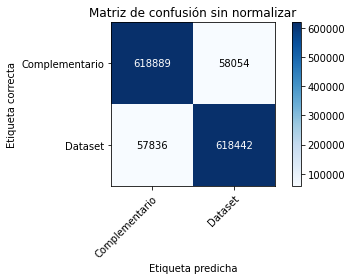

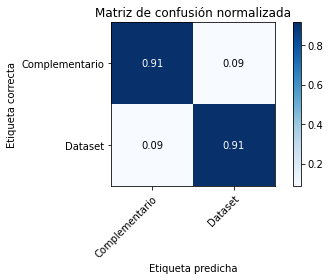

In [ ]:
plot_confusion_matrix(y_test, y_test_pred, normalize = False)
plot_confusion_matrix(y_test, y_test_pred, normalize = True)

Pruebas con un modelo de regresión logística

In [17]:
clf = LogisticRegression(random_state=333).fit(X_train, y_train.values.ravel())

Evaluamos la regresión logística con el conjunto de test

In [18]:
y_test_pred = clf.predict(X_test)

In [19]:
print(classification_report(y_test, y_test_pred))

                precision    recall  f1-score   support

Complementario       0.91      0.91      0.91    676943
       Dataset       0.91      0.91      0.91    676278

      accuracy                           0.91   1353221
     macro avg       0.91      0.91      0.91   1353221
  weighted avg       0.91      0.91      0.91   1353221



Matriz de confusión sin normalizar
[[618889  58054]
 [ 57836 618442]]
Matriz de confusión normalizada
[[0.91424093 0.08575907]
 [0.08552104 0.91447896]]


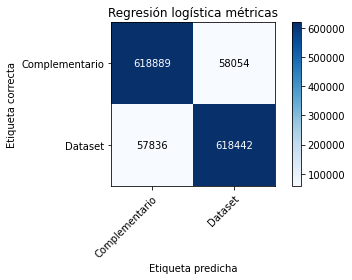

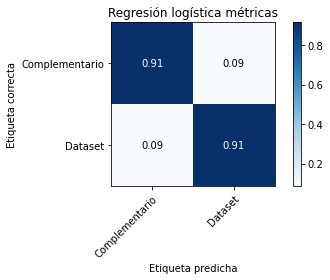

In [ ]:
plot_confusion_matrix(y_test, y_test_pred, normalize = False, title = 'Regresión logística métricas')
plot_confusion_matrix(y_test, y_test_pred, normalize = True, title = 'Regresión logística métricas')

Observamos los pesos de la regresión logística

In [ ]:
print(clf.coef_)

[[ 0.17359278 -0.16838338]]
